# Рынок заведений общественного питания Москвы

## Описание проекта  

Исследование рынка общественного питания на основе открытых данных, подготовка презентации для инвесторов.

## Цели и задачи исследования

* Изучть текущую ситуацию на рынке  
* Дать рекомендации для нового заведения о типе объекта, количестве посадочных мест, а также районе расположения  
* Дать комментарии по возможностям развития сети
* Исследовать вопрос - будет ли успешным и популярным на долгое время кафе, в котором гостей обслуживают роботы-официанты.

## Открытие данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv('/datasets/rest_data.csv')

In [4]:
from io import BytesIO
import requests
spreadsheet_id = '1OzWlXokOSrigeUJ4pNB57B9gB1bzcIexmFKPJ1_7RTI'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
outside_data = pd.read_csv(BytesIO(r.content))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
data.describe(include = 'all')

,id,object_name,chain,object_type,address,number
count,15366.000000,15366,15366,15366,15366,15366.000000
unique,NaN,10393,2,9,9108,NaN
top,NaN,Столовая,нет,кафе,"город Москва, Ходынский бульвар, дом 4",NaN
freq,NaN,267,12398,6099,95,NaN
mean,119720.066901,NaN,NaN,NaN,NaN,59.547182
std,73036.130732,NaN,NaN,NaN,NaN,74.736833
min,838.000000,NaN,NaN,NaN,NaN,0.000000
25%,28524.000000,NaN,NaN,NaN,NaN,12.000000
50%,144974.500000,NaN,NaN,NaN,NaN,40.000000
75%,184262.250000,NaN,NaN,NaN,NaN,80.000000


In [7]:
data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


## Предобработка данных
### Обработка пропущенных значений

In [8]:
for column in data.columns:
    print(column, data[column].isna().mean())

Пропусков в данных не обнаружено

### Преобразование данных

In [9]:
data['id'] = data['id'].astype('str')

В столбце 'id' значения заменены на строковые

### Обработка дубликатов

In [10]:
data.duplicated().sum()

0

Проверим на уникальность значения в столбце 'id'

In [11]:
len(data['id'].unique())

15366

Посмотрим неявные дубликаты в столбце 'object_name'

In [12]:
data['object_name'].value_counts()

Столовая                  267
Кафе                      236
Шаурма                    234
KFC                       155
Шоколадница               142
                         ... 
ШКОЛА 507 КДП               1
Кухня на районе             1
Ресторан «Балзи Росси»      1
КП МГУ буфет 91             1
Хлебная Затея               1
Name: object_name, Length: 10393, dtype: int64

In [13]:
data[data['object_name'].str.contains('Старбакс', case=False)]['object_name'].unique()

array(['Старбакс Starbucks', 'Кофейня «Старбакс»', 'Старбакс',
       'Кафе «Сабвей» Старбакс', 'кафе «Старбакс»',
       'Кафе «Кофейня Старбакс»', 'Кофейня «СТАРБАКС КОФЕ»',
       'Старбакс Кофе', 'Кафе «Старбакс»', 'Starbucks, СТАРБАКС КОФЕ',
       'Starbucks Старбакс'], dtype=object)

In [14]:
data[data['object_name'].str.contains('Starbucks', case=False)]['object_name'].unique()

array(['Старбакс Starbucks', 'Starbucks', 'Кафе «Starbucks»',
       'КАФЕ Starbucks', 'Starbucks кофе', 'Starbucks, СТАРБАКС КОФЕ',
       'Starbucks Старбакс', 'STARBUCKS COFFEE', 'Кофемания Starbucks'],
      dtype=object)

На примере кофеин Starbucks видим разные варианты написания наименования - полностью заглавные буквы, кавычки, англоязычное написание, слова "кафе" и "кофейня" и т.д.
Для того чтобы снизить кол-во вариантов, переведём все наименование в верхний регистр.

In [15]:
len(data['object_name'].unique())

10393

In [16]:
data['object_name'] = data['object_name'].str.upper() 
len(data['object_name'].unique())

9924

Приведём наименование самых известных сетевых заведений к единому названию

In [17]:
def same_name (wrong, correct):
    for wrong in wrong:
        data['object_name'] = data['object_name'].replace(wrong, correct)

In [18]:
mac = data[data['object_name'].str.contains('Макдоналдс', case=False)]['object_name'].unique()
mac_cor = 'МАКДОНАЛДС'
same_name(mac, mac_cor)

In [19]:
star_ru = data[data['object_name'].str.contains('Старбакс', case=False)]['object_name'].unique()
star_eng = data[data['object_name'].str.contains('Старбакс', case=False)]['object_name'].unique()
star_cor = 'STARBUCKS'
same_name(star_ru, star_cor)
same_name(star_eng, star_cor)

In [20]:
brat = data[data['object_name'].str.contains('Братьев Караваев', case=False)]['object_name'].unique()
bratya = data[data['object_name'].str.contains('Братья Караваев', case=False)]['object_name'].unique()
brat_cor = 'КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ'
same_name(brat, brat_cor)
same_name(bratya, brat_cor)

In [21]:
bking = data[data['object_name'].str.contains('Бургер кинг', case=False)]['object_name'].unique()
bking_cor = 'БУРГЕР КИНГ'
same_name(bking, bking_cor)

In [22]:
kfc = data[data['object_name'].str.contains('KFC', case=False)]['object_name'].unique()
kfc_cor = 'KFC'
same_name(kfc, kfc_cor)

In [23]:
ander = data[data['object_name'].str.contains('Андерсон', case=False)]['object_name'].unique()
ander_cor = 'АНДЕРСОН'
same_name(ander, ander_cor)

In [24]:
mint = data[data['object_name'].str.contains('Мята lounge', case=False)]['object_name'].unique()
mint_cor = 'МЯТА LOUNGE'
same_name(mint, mint_cor)

In [25]:
kart = data[data['object_name'].str.contains('Крошка', case=False)]['object_name'].unique()
kart_cor = 'КРОШКА КАРТОШКА'
same_name(kart, kart_cor)

In [26]:
terem = data[data['object_name'].str.contains('Теремок', case=False)]['object_name'].unique()
terem_cor = 'ТЕРЕМОК'
same_name(terem, terem_cor)

In [27]:
milti = data[data['object_name'].str.contains('Милти', case=False)]['object_name'].unique()
milti_cor = 'МИЛТИ'
same_name(milti, milti_cor)

In [28]:
il = data[data['object_name'].str.contains('Иль Патио', case=False)]['object_name'].unique()
il_cor = 'ИЛЬ ПАТИО'
same_name(il, il_cor)

In [29]:
domi = data[data['object_name'].str.contains('Домино', case=False)]['object_name'].unique()
domi_cor = 'ДОМИНОС ПИЦЦА'
same_name(domi, domi_cor)

In [30]:
papa = data[data['object_name'].str.contains('Джонс', case=False)]['object_name'].unique()
papa_cor = 'ПАПА ДЖОНС'
same_name(papa, papa_cor)

Посмотрим на кол-во дубликатов по сочетанию стобцов `object_name` и `address`

В исходных данных в столбце 'object_name' большое кол-во неявных дубликатов, связанных с отсутствием формы заполнения наименования заведений. Часть значений была приведена к единому виду. Тем не менее бОльшая часть данных требует проверки и корректировки.

## Анализ данных

### Cоотношение видов объектов общественного питания по количеству.

In [33]:
data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

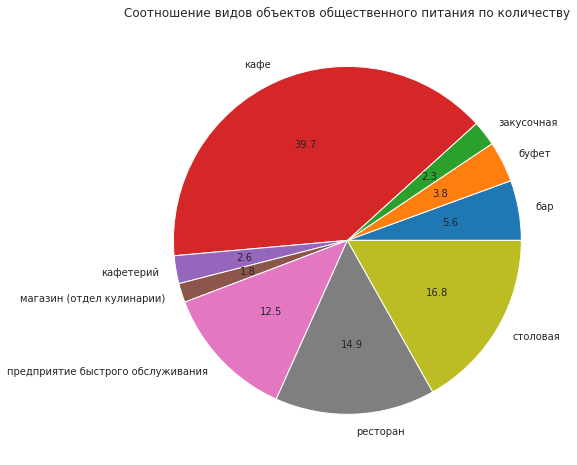

In [34]:
(
    data.pivot_table(index = 'object_type', values = 'id', aggfunc = 'count')
        .plot(kind = 'pie', subplots=True, legend = False, figsize = (8, 8), ylabel = "", autopct='%.1f')
)
plt.title('Соотношение видов объектов общественного питания по количеству');

Лидеры по кол-ву заведений: кафе, столовые, рестораны и ПБО.  
### Cоотношение сетевых и несетевых заведений по количеству.

In [35]:
data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

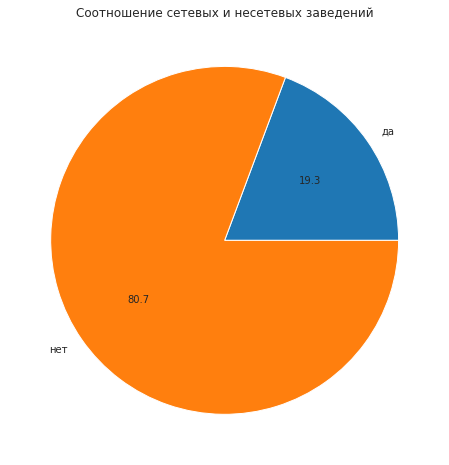

In [36]:
(
    data.pivot_table(index = 'chain', values = 'id', aggfunc = 'count')
    .plot(kind = 'pie', subplots=True, legend = False, figsize = (8, 8), ylabel = "", autopct='%.1f')
)
plt.title('Соотношение сетевых и несетевых заведений');

Количество несетевых объектов более чем в 4 раза превышает кол-во сетевых заведений.  
Посмотрим, для каких видов заведений характерно сетевое распространение.

In [37]:
(
data.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = 'count')
    .div(data['object_type'].value_counts(), axis=0)
    .sort_values(by='да', ascending = False)
)

chain,да,нет
предприятие быстрого обслуживания,0.411336,0.588664
магазин (отдел кулинарии),0.285714,0.714286
ресторан,0.238074,0.761926
кафе,0.228890,0.771110
закусочная,0.155556,0.844444
кафетерий,0.130653,0.869347
бар,0.043224,0.956776
буфет,0.018803,0.981197
столовая,0.001160,0.998840


Чуть больше 40% предприятий быстрого обслуживания являются сетевыми заведениями.  
На втором месте - магазины с кулинарией - почти 29%.  
Далее - рестораны и кафе. Каждое четвёртое заведение - является сетевым. 
### Характеристика сетей: количество заведений и посадочных мест
Рассмотри, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест или мало заведений с большим количеством посадочных мест.

In [38]:
chain_objects = data.loc[data['chain'] == 'да'].pivot_table(index = 'object_name', values = ['id','number'], aggfunc = {'number':'median', 'id':'count'})
chain_objects = chain_objects.loc[chain_objects['id'] > 1] # исключаем "сети", в которых только одно заведение
chain_objects.describe()

,id,number
count,213.000000,213.000000
mean,12.638498,58.490610
std,27.469294,48.938688
min,2.000000,0.000000
25%,2.000000,20.000000
50%,4.000000,45.000000
75%,7.000000,90.000000
max,188.000000,245.000000


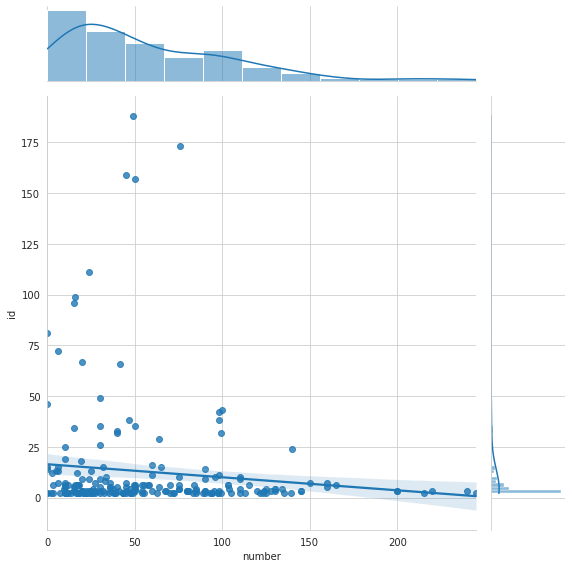

In [39]:
sns.jointplot(x='number', y='id', data=chain_objects, kind='reg', height=8);

Для сетей характерно небольшое кол-во заведений: у 75% - их от 2 до 8.  
И небольшое количество посадочных мест - от 20 до 90.  
Рассмотрим количество посадочных мест для каждого вида объекта общественного питания.

Text(0, 0.5, '')

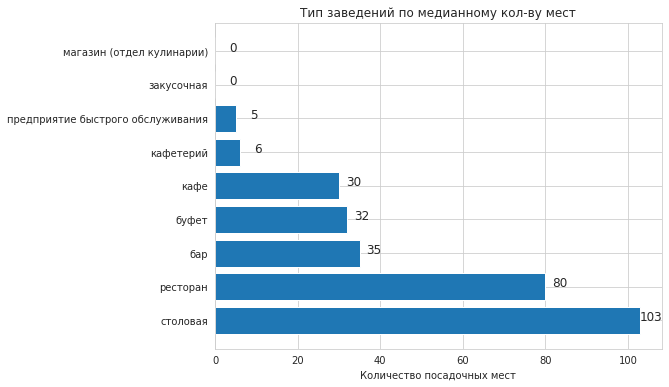

In [40]:
object_number = data.pivot_table(index = 'object_type', values = 'number', aggfunc = 'median').sort_values(by = 'number', ascending = False).reset_index()
plt.figure(figsize = (8, 6))
#sns.barplot(x = 'number', y = 'object_type', data = object_number)
plt.barh(object_number['object_type'], object_number['number'])
for x,y in zip(object_number['number'], object_number['object_type']):
    label = "{:.0f}".format(x)
    plt.annotate(label,
                 (x,y),
                 textcoords = "offset points",
                 xytext = (22, 0),
                 ha = 'right',
                fontsize = 12)
plt.title('Тип заведений по медианному кол-ву мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel("")

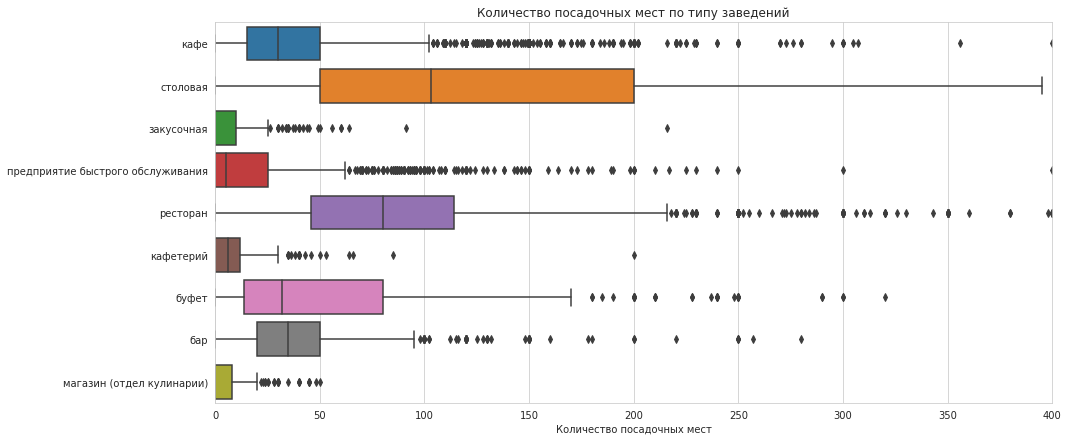

In [41]:
plt.figure(figsize = (15, 7))
plt.xlim(0, 400) 
sns.boxplot(x = 'number', y = 'object_type', data = data)
plt.title('Количество посадочных мест по типу заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel("");

Наибольшее количество посадочных мест у столовых.
### Анализ расположения заведений: улицы
Выделим в отдельный столбец информацию об улице из столбца 'address'

In [42]:
street_types = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека']
def street(address):
    for address_part in address.split(', '):
        for street_type in street_types:
            if address_part.lower().find(street_type)!= -1:
                return address_part

data['street'] = data['address'].apply(street)

Рассмотрим график топ-10 улиц по количеству объектов общественного питания.

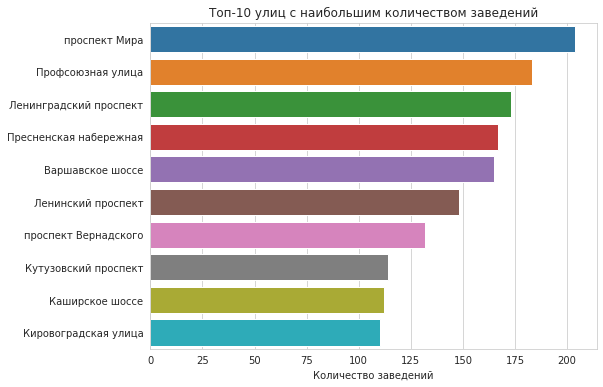

In [43]:
street_group = data.pivot_table(index = 'street', values = 'id', aggfunc = 'count').reset_index()
top10 = street_group.sort_values(by = 'id', ascending = False).head(10)
plt.figure(figsize = (8, 6))
sns.barplot(x = 'id', y = 'street', data = top10)
plt.title('Топ-10 улиц с наибольшим количеством заведений')
plt.xlabel('Количество заведений')
plt.ylabel("");

Используя внешнюю информацию, найдём в каких районах Москвы находятся эти улицы.

In [44]:
pd.set_option('display.max_colwidth', None)
top10_with_area = top10.merge(outside_data, left_on='street', right_on='streetname')
top10_with_area.groupby('street')['area'].unique()

street
Варшавское шоссе          [Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово]
Каширское шоссе                                                                        [Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное]
Кировоградская улица                                                                                                          [Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное]
Кутузовский проспект                                                                                                                                              [Район Дорогомилово, Район Фили-Давыдково]
Ленинградский проспект                                                                                                                       [Район Аэропорт, Район Беговой, 

Смотрим количество улиц с одним объектом общественного питания.

In [45]:
only_one = street_group[street_group['id'] == 1]
len(only_one)

551

Используя внешнюю информацию, рассмотрим в каких районах Москвы находятся эти улицы.

In [46]:
only_one_with_area = only_one.merge(outside_data, left_on='street', right_on='streetname')
only_one_with_area['area'].unique()

array(['Район Аэропорт', 'Басманный район', 'Красносельский район',
       'Район Свиблово', 'Рязанский район', 'Район Якиманка',
       'Район Хамовники', 'Район Соколиная Гора', 'Даниловский район',
       'Мещанский район', 'Таганский район', 'Район Лефортово',
       'Район Печатники', 'Район Замоскворечье', 'Хорошевский район',
       'Район Арбат', 'Алексеевский район', 'Район Текстильщики',
       'Район Ростокино', 'Район Раменки', 'Район Хорошево-Мневники',
       'Район Покровское-Стрешнево', 'Район Марьина роща',
       'Район Сокольники', 'Район Богородское', 'Нижегородский район',
       'Тверской район', 'Лосиноостровский район', 'Район Преображенское',
       'Район Ново-Переделкино', 'Район Измайлово',
       'Район Северное Измайлово', 'Район Восточное Измайлово',
       'Район Беговой', 'Донской район', 'Район Гольяново',
       'Войковский Район', 'Савеловский район', 'Район Филевский Парк',
       'Район Перово', 'Район Чертаново Южное', 'Южнопортовый Район',
      

### Анализ расположения заведений: округа и районы
Выделим округа с наибольшим кол-вом заведений

In [47]:
data_with_area = data.merge(outside_data, left_on='street', right_on='streetname')
data_with_area.pivot_table(index = 'okrug', values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False)

,id
okrug,
ЦАО,5877
ЮАО,4445
ЮЗАО,4082
САО,3448
СВАО,3304
ЗАО,2684
ВАО,2143
ЮВАО,1932
СЗАО,1025


Выделим топ-10 районов по наибольшему кол-вом заведений

In [48]:
data_with_area.pivot_table(index = ['area', 'okrug'], values = 'id', aggfunc = 'count').sort_values(by = 'id', ascending = False).head(10)

,,id
area,okrug,
Тверской район,ЦАО,1135
Пресненский район,ЦАО,795
Басманный район,ЦАО,706
Даниловский район,ЮАО,678
Мещанский район,ЦАО,671
Донской район,ЮАО,587
Таганский район,ЦАО,549
Обручевский район,ЮЗАО,496
Район Замоскворечье,ЦАО,480


Рассмотрим районы в ЦАО по количеству кафе и ресторанов

In [49]:
(
data_with_area.query('okrug == "ЦАО" and (object_type == "кафе" or object_type == "ресторан")')
    .pivot_table(index = 'area', values = 'id', aggfunc = 'count').reset_index()
    .sort_values(by = 'id')
)


,area,id
1,Красносельский район,244
6,Район Хамовники,263
7,Район Якиманка,284
4,Район Арбат,301
8,Таганский район,340
5,Район Замоскворечье,342
2,Мещанский район,473
0,Басманный район,481
3,Пресненский район,635
9,Тверской район,857


Наименьшая конкуренция в наиболее популярном округе в районах: Красноселский, Хамовники, Якиманка, Арбат и Таганский.

## Вывод

Можно предположить, что концепция заведения с использованием роботов будет в первую очередь интересна молодой аудитории, которая не боится пробовать что-то новое. А так же семьям с детьми и подростками, в качестве места для необычного проведения общего семейного досуга.  
Лучшим соседством для кафе, в таком случае, могут стать главные парки (Парк Горького, ВДНХ), а также крупные ТЦ (как вариант, заведение непосредственно в самом ТЦ). 
  
Для того чтобы снизить опасения инвесторов, связанные со снижением интереса к роботам с течением времени, необходимо рассматривать места с хорошей проходимостью. Главным образом - это центральный округ с пешеходно-туристическими маршрутами. 
Наименьшая конкуренция в наиболее популярном округе в районах: **Красноселский, Хамовники, Якиманка, Арбат и Таганский**.
  
Поскольку концепция подразумевает наличие роботов-официантов лучшими видами заведения становятся **кафе** и **ресторан**.
  
Исходя из средних показателей, в **кафе** рекомендуется **30-35 посадочных мест**, для **ресторан** чуть больше - **80-90**.  
  
Так же варианты (кафе на 30-35 мест и ресторан на 80-90 мест) характерны для сетевых заведений. Поэтому для успешного развития заведения в сетевое распространение, можно придерживаться этих же рекомендаций.  
  
В качестве дополнения к возможностям развитя проекта можно предложить доставку из кафе/ресторана средствами роботов, по аналогии с роверами.

Ссылка на презентацию: https://1drv.ms/p/s!Ak1-sB34FBGClTpjQ0rCVXTllINT?e=dAwgG5